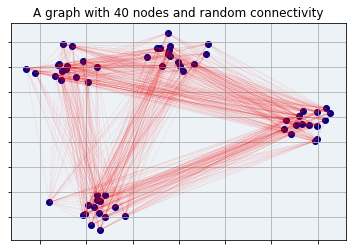

In [17]:
import random
random.seed(5)
import matplotlib.pyplot as plt
import matplotlib as plt
import numpy as np
np.random.seed(10)
from matplotlib import collections  as mc
import copy
import time

NUMBER_OF_POINTS = 60
# RANDOM_STATE = 42
RANDOM_STATE = 42


# mylist = [(random.randint(0,100),random.randint(0,100)) for k in range(100)]
# print(mylist[0])
from sklearn.datasets import make_blobs
X,y = make_blobs(NUMBER_OF_POINTS,centers=4,random_state = RANDOM_STATE)
# print(X)
plt.pyplot.scatter(X[:,0],X[:,1],c='darkblue')
plt.pyplot.grid(True)
plt.pyplot.title('A graph with 40 nodes and random connectivity')
ax = plt.pyplot.gca()
# ax.set_facecolor((0.2,0.2,0.2))
ax.set_facecolor('#ecf2f6')
# ----------------------------- Make Graph --------------------------
# Make distance matrix for these
# print(X)
nodenodeIncidence = np.random.uniform(low=0.0, high=1.0, size=(len(X),len(X)))
threshold_indices = nodenodeIncidence<0.5
nodenodeIncidence[threshold_indices]=0
connect_indices = nodenodeIncidence!=0.0
nodenodeIncidence[connect_indices]=1
np.fill_diagonal(nodenodeIncidence,1)
nodenodeIncidencefull = copy.deepcopy(nodenodeIncidence)
for i in range(len(nodenodeIncidence)):
    for j in range(i):
        if(nodenodeIncidence[i,j]==1):
            nodenodeIncidencefull[j,i]=nodenodeIncidence[i,j]
#             s+=1
#             print('i: ',i,'j: ',j)
#             lines.append([tuple(X[i]),tuple(X[j])])
#             distanceKNN[i,j] = np.linalg.norm(X[i]-X[j])
updatednodenodeIncidence = np.tril(nodenodeIncidence)

distance = np.full(shape=(len(X),len(X)),fill_value=float('inf'),dtype=np.float32)

# print(nodenodeIncidence)
# print('-'*50)
# print(updatednodenodeIncidence)
# print(len(distance))

# lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
# c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

# make lines based on if they're connected
lines=[]
s=0
for i in range(len(nodenodeIncidence)):
    for j in range(i):
        if(updatednodenodeIncidence[i,j]==1):
            s+=1
#             print('i: ',i,'j: ',j)
            lines.append([tuple(X[i]),tuple(X[j])])
            distance[i,j] = np.linalg.norm(X[i]-X[j])
# print(s)
# print(distance)

# lc = mc.LineCollection(lines, colors=c, linewidths=1)
lc = mc.LineCollection(lines, colors='red', linewidths=0.05)
# fig, ax = pl.subplots()
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.add_collection(lc)
# ax.autoscale()
# ax.margins(0.1)

# plt.pyplot.scatter(*zip(*mylist))

In [18]:
# Compute MST of Graph

In [19]:
# -------------------------- BORUVKA MST
# -------------------------- Code by Neelam Yadav https://www.geeksforgeeks.org/boruvkas-algorithm-greedy-algo-9/
#  Boruvka's algorithm to find Minimum Spanning 
# Tree of a given connected, undirected and weighted graph 
  
from collections import defaultdict 
  
#Class to represent a graph 
class Graph: 
  
    def __init__(self,vertices,X): 
        self.V= vertices #No. of vertices 
        self.graph = [] # default dictionary to store graph 
        self.X = X # points
          
   
    # function to add an edge to graph 
    def addEdge(self,u,v,w): 
        self.graph.append([u,v,w]) 
  
    # A utility function to find set of an element i 
    # (uses path compression technique) 
    def find(self, parent, i): 
        if parent[i] == i: 
            return i 
        return self.find(parent, parent[i]) 
  
    # A function that does union of two sets of x and y 
    # (uses union by rank) 
    def union(self, parent, rank, x, y): 
        xroot = self.find(parent, x) 
        yroot = self.find(parent, y) 
  
        # Attach smaller rank tree under root of high rank tree 
        # (Union by Rank) 
        if rank[xroot] < rank[yroot]: 
            parent[xroot] = yroot 
        elif rank[xroot] > rank[yroot]: 
            parent[yroot] = xroot 
        #If ranks are same, then make one as root and increment 
        # its rank by one 
        else : 
            parent[yroot] = xroot 
            rank[xroot] += 1
  
    # The main function to construct MST using Kruskal's algorithm 
    def boruvkaMST(self): 
        MSTlines=[]
        parent = []; rank = [];  
  
        # An array to store index of the cheapest edge of 
        # subset. It store [u,v,w] for each component 
        cheapest =[] 
  
        # Initially there are V different trees. 
        # Finally there will be one tree that will be MST 
        numTrees = self.V 
        MSTweight = 0
  
        # Create V subsets with single elements 
        for node in range(self.V): 
            parent.append(node) 
            rank.append(0) 
            cheapest =[-1] * self.V 
      
        # Keep combining components (or sets) until all 
        # compnentes are not combined into single MST 
  
        while numTrees > 1: 
  
            # Traverse through all edges and update 
               # cheapest of every component 
            for i in range(len(self.graph)): 
  
                # Find components (or sets) of two corners 
                # of current edge 
                u,v,w =  self.graph[i] 
                set1 = self.find(parent, u) 
                set2 = self.find(parent ,v) 
  
                # If two corners of current edge belong to 
                # same set, ignore current edge. Else check if  
                # current edge is closer to previous 
                # cheapest edges of set1 and set2 
                if set1 != set2:      
                      
                    if cheapest[set1] == -1 or cheapest[set1][2] > w : 
                        cheapest[set1] = [u,v,w]  
  
                    if cheapest[set2] == -1 or cheapest[set2][2] > w : 
                        cheapest[set2] = [u,v,w] 
  
            # Consider the above picked cheapest edges and add them 
            # to MST 
            for node in range(self.V): 
                counter=1
                #Check if cheapest for current set exists 
                if cheapest[node] != -1: 
                    u,v,w = cheapest[node] 
                    set1 = self.find(parent, u) 
                    set2 = self.find(parent ,v) 
  
                    if set1 != set2 : 
                        MSTweight += w 
                        self.union(parent, rank, set1, set2) 
                        print ("%d: Edge %d-%d with weight %d included in MST" % (counter,u,v,w)) 
                        counter+=1
                        MSTlines.append([tuple(self.X[u]),tuple(self.X[v])])
                        numTrees = numTrees - 1

            #reset cheapest array 
            cheapest =[-1] * self.V 
  
              
        print ("Weight of MST is %d" % MSTweight)
        return MSTlines

In [20]:
# We will now create the 'Graph' so that it can be computed by Boruvka's
# Using the distance matrix ...
# indicesofzero1 = distance<1
# indicesofzero2 = distance>0
# distance[indicesofzero1 and indicesofzero2]=1
c=0
for i in range(len(distance)):
    for j in range(i):
        if distance[i][j]<1.0 and distance[i,j]>0.0:
            distance[i][j]=1
# print(c)
# print(distance)

In [21]:
FullGraph = Graph(len(distance),X)
for i in range(len(distance)):
    for j in range(i):
        if distance[i,j]!=-1.0:
            FullGraph.addEdge(i,j,distance[i,j])
#             print(distance[i,j])

In [22]:
FullGraph.V

60

In [23]:
time1 = time.clock()
MSTLines = FullGraph.boruvkaMST()
time2 = time.clock()
print('MST with full graph took %f seconds' % (time2-time1))

1: Edge 20-0 with weight 1 included in MST
1: Edge 58-1 with weight 1 included in MST
1: Edge 18-2 with weight 1 included in MST
1: Edge 6-3 with weight 1 included in MST
1: Edge 4-2 with weight 1 included in MST
1: Edge 24-5 with weight 1 included in MST
1: Edge 56-7 with weight 1 included in MST
1: Edge 16-8 with weight 1 included in MST
1: Edge 56-9 with weight 1 included in MST
1: Edge 40-10 with weight 1 included in MST
1: Edge 21-11 with weight 1 included in MST
1: Edge 46-12 with weight 1 included in MST
1: Edge 13-12 with weight 2 included in MST
1: Edge 44-14 with weight 1 included in MST
1: Edge 22-15 with weight 1 included in MST
1: Edge 55-17 with weight 1 included in MST
1: Edge 40-19 with weight 2 included in MST
1: Edge 20-16 with weight 1 included in MST
1: Edge 21-18 with weight 1 included in MST
1: Edge 23-3 with weight 1 included in MST
1: Edge 25-3 with weight 1 included in MST
1: Edge 26-23 with weight 1 included in MST
1: Edge 45-27 with weight 1 included in MST
1

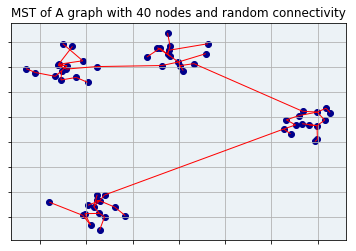

In [24]:
plt.pyplot.scatter(X[:,0],X[:,1],c='darkblue')
plt.pyplot.grid(True)
plt.pyplot.title('MST of A graph with 40 nodes and random connectivity')
ax = plt.pyplot.gca()
# ax.set_facecolor((0.2,0.2,0.2))
ax.set_facecolor('#ecf2f6')
mstlc = mc.LineCollection(MSTLines, colors='red', linewidths=1)
# fig, ax = pl.subplots()
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.add_collection(mstlc)

In [ ]:
# Now we need to make a KNN of the original graph where k = floor(ln(k))+c
# find neighbours (if nodenodeincidence matrix !=0)
# KNN of them 
# Calculate distance of neighbours 
# k nearnest neighbours

 

In [12]:
print(distance)
print(len(X))

[[       inf        inf        inf ...        inf        inf        inf]
 [ 2.5759523        inf        inf ...        inf        inf        inf]
 [14.392485  13.317378         inf ...        inf        inf        inf]
 ...
 [15.016871         inf        inf ...        inf        inf        inf]
 [       inf  9.896662  15.62522   ...        inf        inf        inf]
 [12.1972           inf 15.986331  ... 17.190022   1.               inf]]
40


In [25]:
# make full distance matrix
distanceKNN=np.full(shape=(len(X),len(X)),fill_value=float('inf'),dtype=np.float32)
for i in range(len(nodenodeIncidence)):
    for j in range(len(nodenodeIncidence)):
        if(nodenodeIncidencefull[i,j]==1) and i!=j:
#             s+=1
#             print('i: ',i,'j: ',j)
#             lines.append([tuple(X[i]),tuple(X[j])])
            distanceKNN[i,j] = np.linalg.norm(X[i]-X[j])
        

In [26]:
# dict(list(enumerate(distanceKNN)))
# print(updatednodenodeIncidence)
# distanceKNN[4999]

In [27]:
# return index of k smallest values in O(n) time!!!
import math
C = 1
k = math.floor(math.log(NUMBER_OF_POINTS)) + C
# distanceKNN[0][21]=float('inf')
# knnList
updatednodenodeIncidenceKNN = copy.deepcopy(updatednodenodeIncidence)
for i in range(NUMBER_OF_POINTS):
    idx = np.argpartition(distanceKNN[i],k)
    for j in range(NUMBER_OF_POINTS):
        if j not in idx[:k]:
            updatednodenodeIncidenceKNN[i,j] = 0

# make lines based on if they're connected
knnlines=[]
# s=0
for i in range(len(nodenodeIncidence)):
    for j in range(i):
        if(updatednodenodeIncidenceKNN[i,j]==1):
#             s+=1
#             print('i: ',i,'j: ',j)
            knnlines.append([tuple(X[i]),tuple(X[j])])
            distance[i,j] = np.linalg.norm(X[i]-X[j])
        

idx = np.argpartition(distanceKNN[0],k)
# print(idx[:k])
# print(idx)
# print('')
# print(distanceKNN[0][idx])

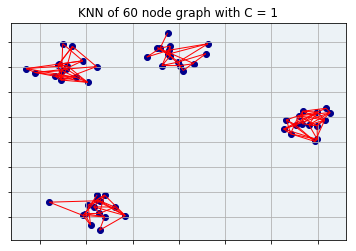

In [30]:
plt.pyplot.scatter(X[:,0],X[:,1],c='darkblue')
plt.pyplot.grid(True)
plt.pyplot.title('KNN of 60 node graph with C = 1')
ax = plt.pyplot.gca()
# ax.set_facecolor((0.2,0.2,0.2))
ax.set_facecolor('#ecf2f6')
mstlc = mc.LineCollection(knnlines, colors='red', linewidths=1)
# fig, ax = pl.subplots()
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.add_collection(mstlc)

In [ ]:
# Now we want to use this KNN representation of the graph to do an MST
KNNGraph = Graph(len(distance),X)
for i in range(len(distance)):
    for j in range(i):
        if updatednodenodeIncidenceKNN[i,j]==1.0:
            KNNGraph.addEdge(i,j,distance[i,j])
#             print(distance[i,j])

In [ ]:
updatednodenodeIncidenceKNN

In [ ]:
time1 = time.clock()
kNNMSTLines = KNNGraph.boruvkaMST()
time2 = time.clock()
print('kNN-MST took %f seconds' % (time2-time1))
# print(kNNMSTLines)

In [ ]:
plt.pyplot.scatter(X[:,0],X[:,1],c='darkblue')

plt.pyplot.grid(True)
plt.pyplot.title('MST made with kNN of graph')
ax2 = plt.pyplot.gca()
# ax3 = plt.pyplot.subplot(1,1,1)
# ax.set_facecolor((0.2,0.2,0.2))
ax2.set_facecolor('#ecf2f6')
mstlc = mc.LineCollection(kNNMSTLines, colors='red', linewidths=1)
# fig, ax = pl.subplots()
# ax2.hold()
ax2.add_collection(mstlc)
ax2.plot(2.5,-5.5,c='yellow')



In [ ]:
# kNNMSTLines

In [ ]:
THRESHOLD_VALUE = 2.0
# Efficient MST based clustering means the threshols must be computed 
# such that it is not too small or too large (edge cases of n or 0 clusters)
STEP_SIZE = 1.0
len(kNNMSTLines)
np.linalg.norm(np.asarray(kNNMSTLines[0][1])-np.asarray(kNNMSTLines[0][0]))